In [7]:
import numpy as np
import matplotlib.pyplot as plt

![](assets/2.5_programming_excersise.png)

In [8]:
def run_simulation(epsilon, alpha):
    K = 10
    TRUE_ACTION_VALUES = np.zeros(K)
    rewards = []

    def sample_reward(index):
        return np.random.randn() + TRUE_ACTION_VALUES[index]

    def choose_action(epsilon, q):
        explore = np.random.rand() < epsilon
        return np.random.randint(K) if explore else np.argmax(q)
    
    q = np.zeros(K)
    n = np.zeros(K)

    for i in range(10000):
        action_values_increment = np.random.normal(0, 0.01, K)
        TRUE_ACTION_VALUES += action_values_increment
        a = choose_action(epsilon, q)
        r = sample_reward(a)
        n[a] += 1
        if alpha == '1/n':
            step_alpha = 1 / n[a]
        else:
            step_alpha = alpha
        q[a] = q[a] + step_alpha * (r - q[a])
        
        rewards.append(r)

    return rewards

In [9]:
sample_average_all_rewards = []
for i in range(2000):
    rewards = run_simulation(.1, '1/n')
    sample_average_all_rewards.append(rewards)

sample_average_all_rewards = np.array(sample_average_all_rewards)
sample_average_average_reward_per_step = np.mean(sample_average_all_rewards, axis=0)

In [10]:
constant_alpha_all_rewards = []
for i in range(2000):
    rewards = run_simulation(.1, .1)
    constant_alpha_all_rewards.append(rewards)

constant_alpha_all_rewards = np.array(constant_alpha_all_rewards)
constant_alpha_average_reward_per_step = np.mean(constant_alpha_all_rewards, axis=0)

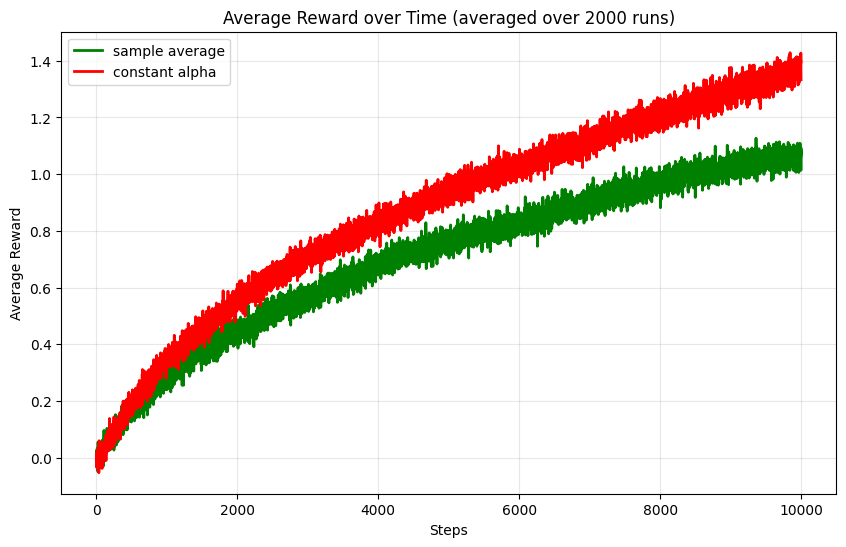

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10001), sample_average_average_reward_per_step, 'g-', linewidth=2, label='sample average')
plt.plot(range(1, 10001), constant_alpha_average_reward_per_step, 'r-', linewidth=2, label='constant alpha')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over 2000 runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()